In [1]:
import json

import numpy as np
from sklearn.ensemble import RandomForestClassifier

from experiments import Experiment, plot_experiments, plot_experiment

In [2]:
def load_data(file_path = "experiments.json"):
    try:
        with open(file_path, "r") as f:
            return json.load(f)
    except FileNotFoundError:
        return []

def save_data(data_array, file_path = "experiments.json"):
    with open(file_path, "w") as f:
        json.dump(data_array, f, indent=4)

In [3]:
experiments = []

clf = RandomForestClassifier()
datasets = ["amazon", "heartbeat"]
k_list = [5, 10, 15]
t_list = [0.1, 1, 10]

# for dataset in datasets:
#     for denoise in [False, True]:
#         for use_y in [False, True]:
#             for k in k_list:
#                 for t in t_list:
#                     experiments.append(Experiment(clf, dataset, denoise, use_y, k, t))

print(f"{len(experiments)} experiments ready")

0 experiments ready


In [4]:
R = 40

r_list = np.arange(4, R + 1, 2).tolist()
print(r_list)

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]


In [5]:
results = load_data()

for exp in experiments:
    print(exp.desc)
    
    metrics = exp.run(r_list)
    results.append({"desc": exp.desc, "r_list": r_list, "metrics": metrics})
    
    plot_experiment(results[-1])

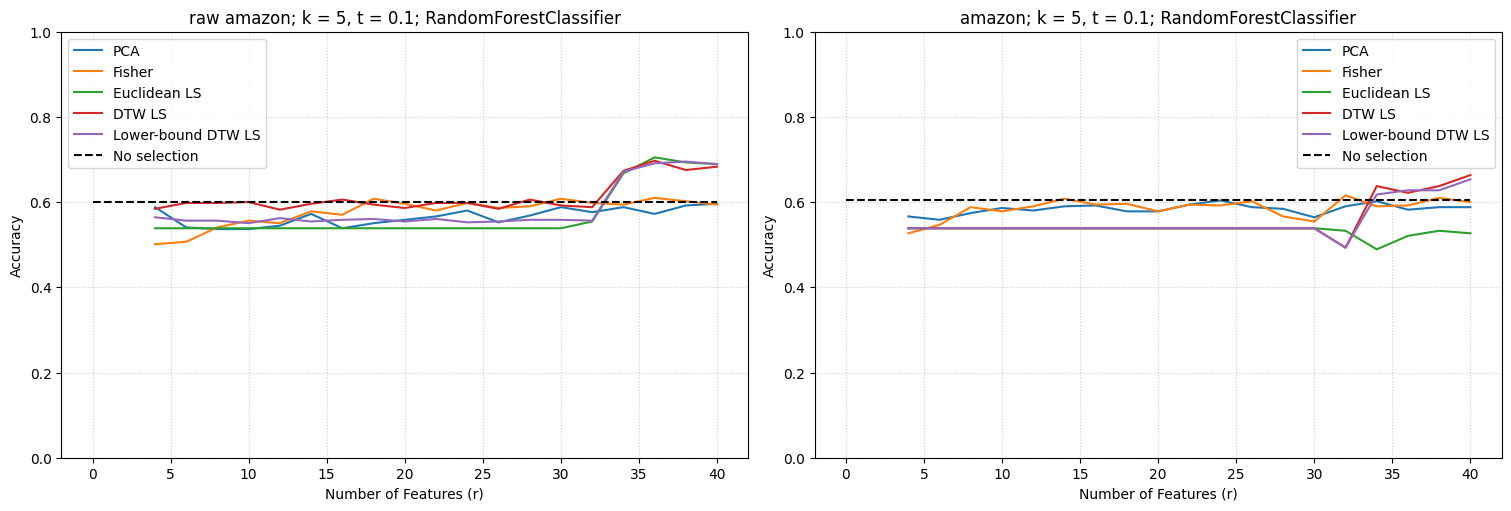

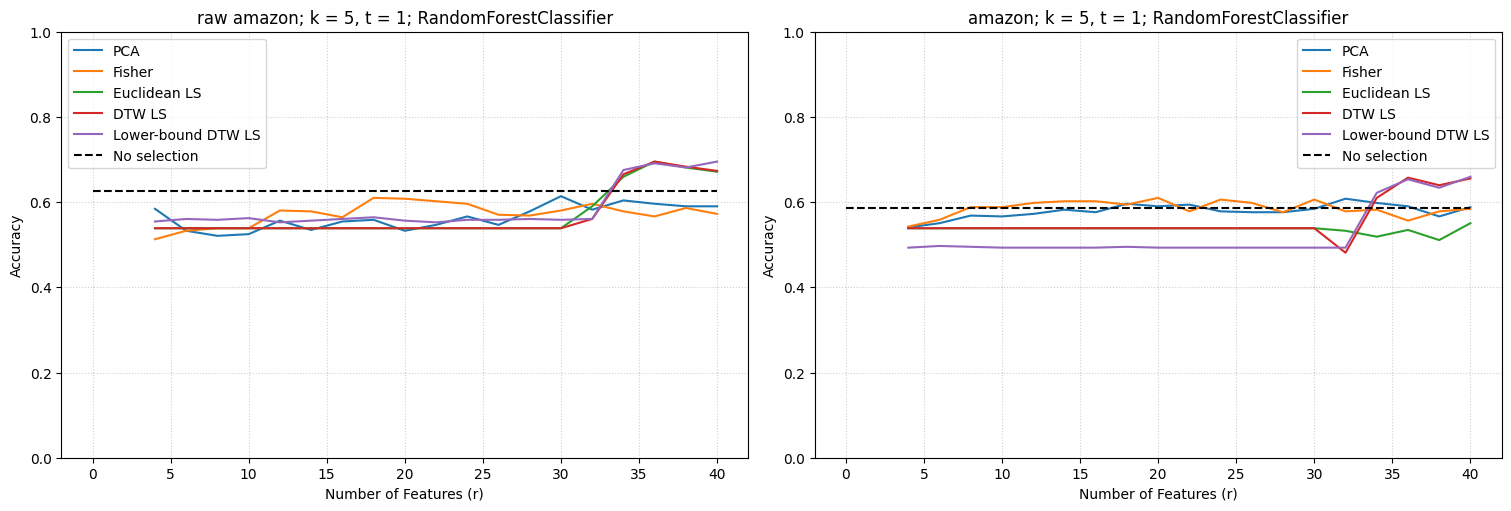

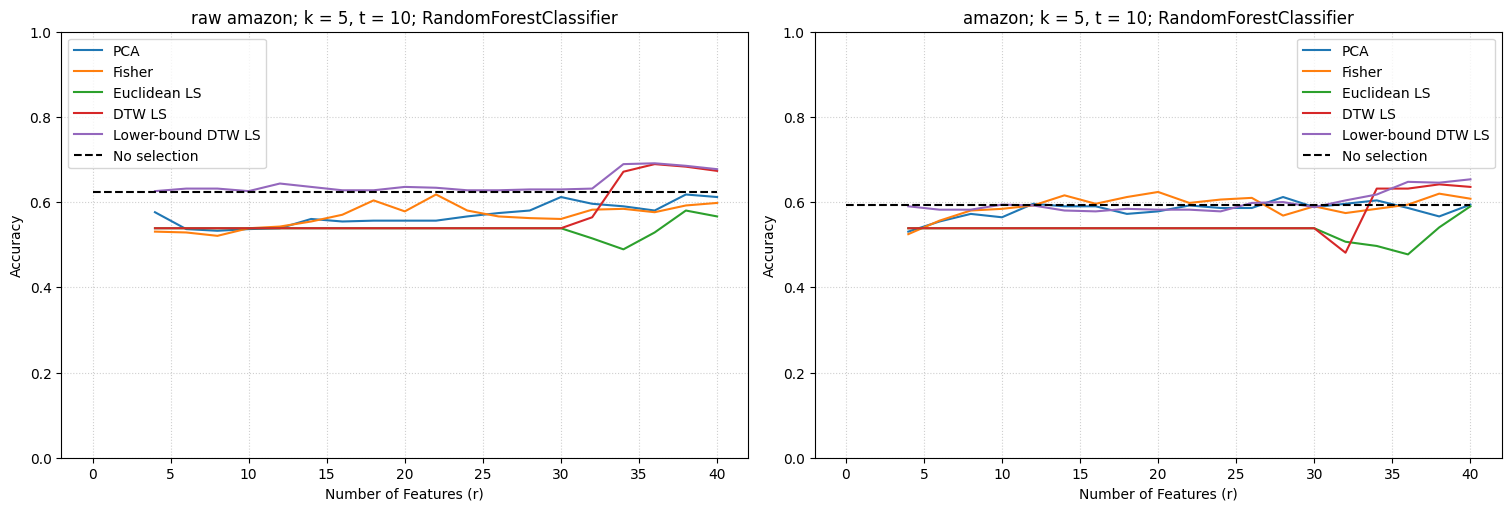

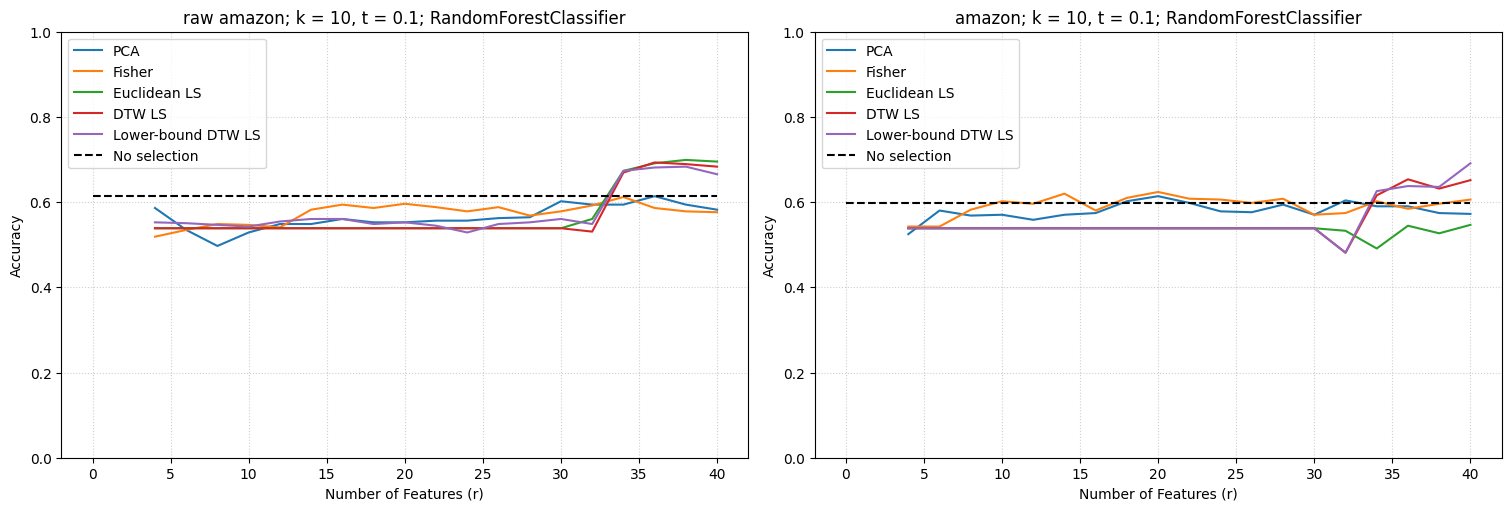

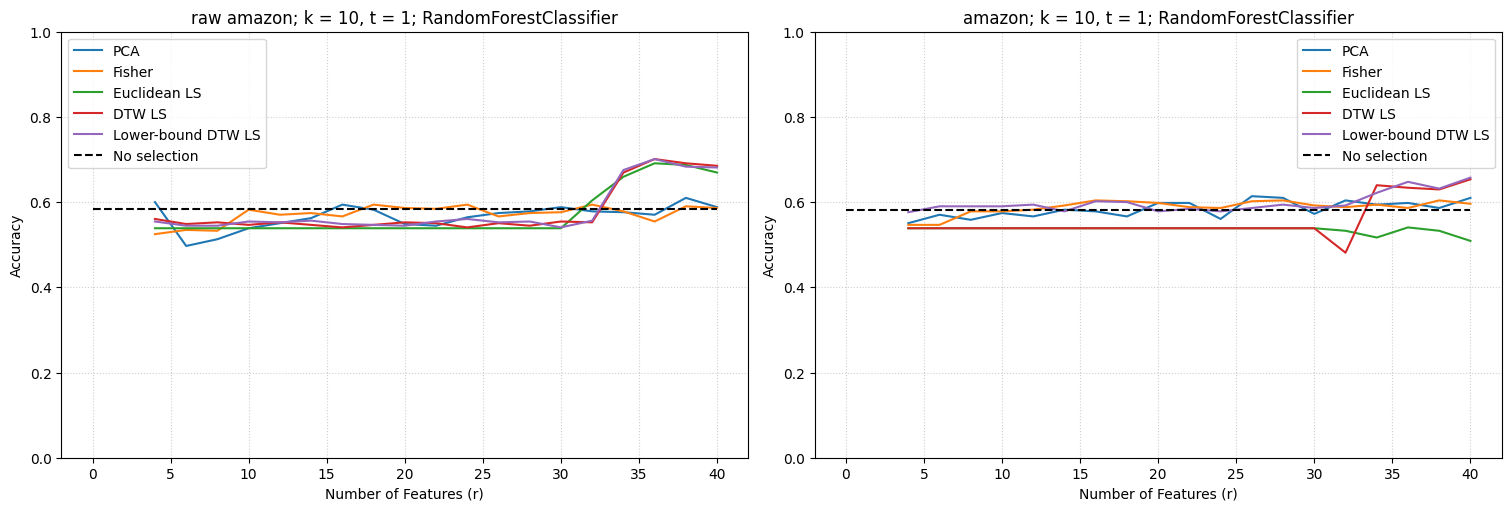

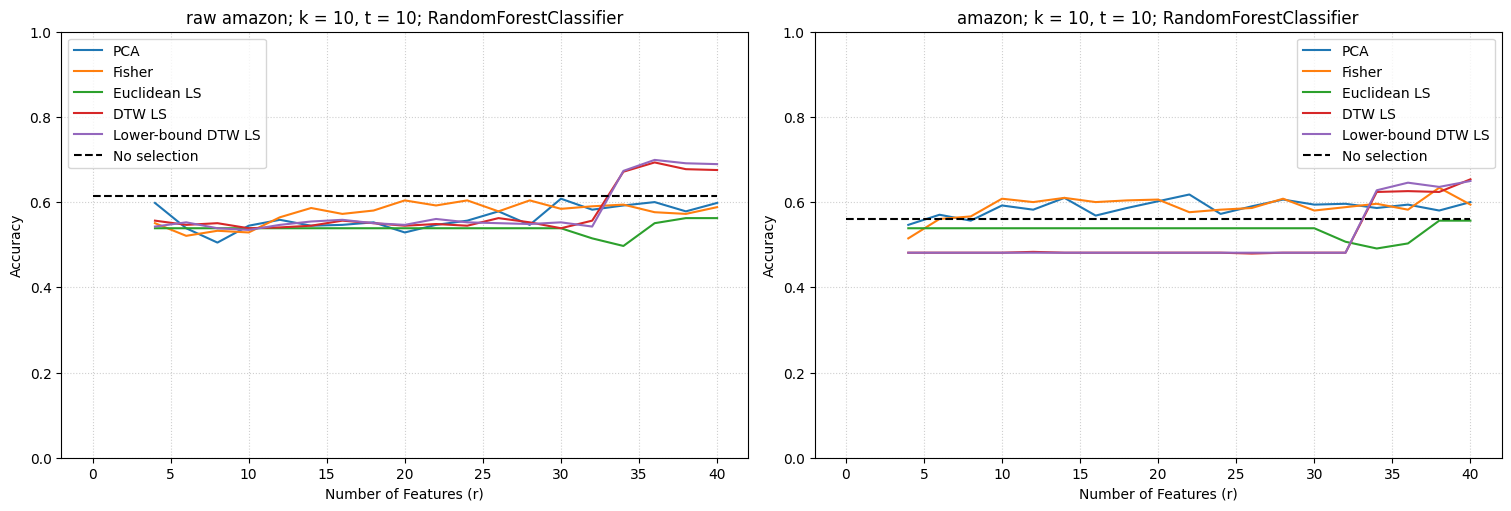

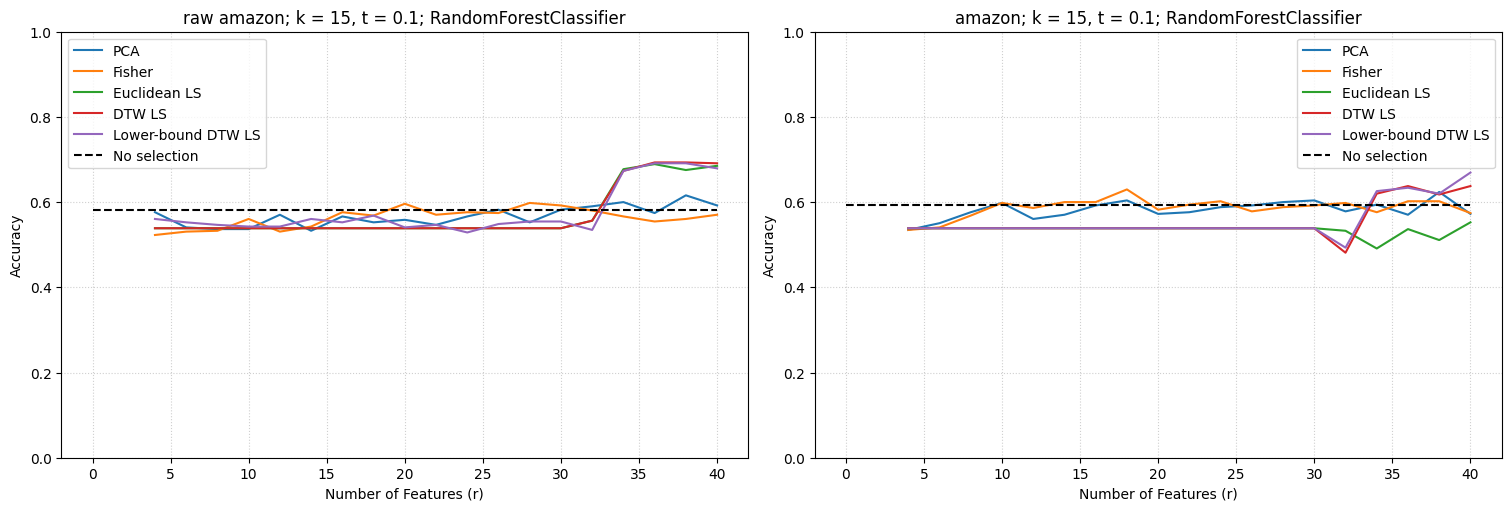

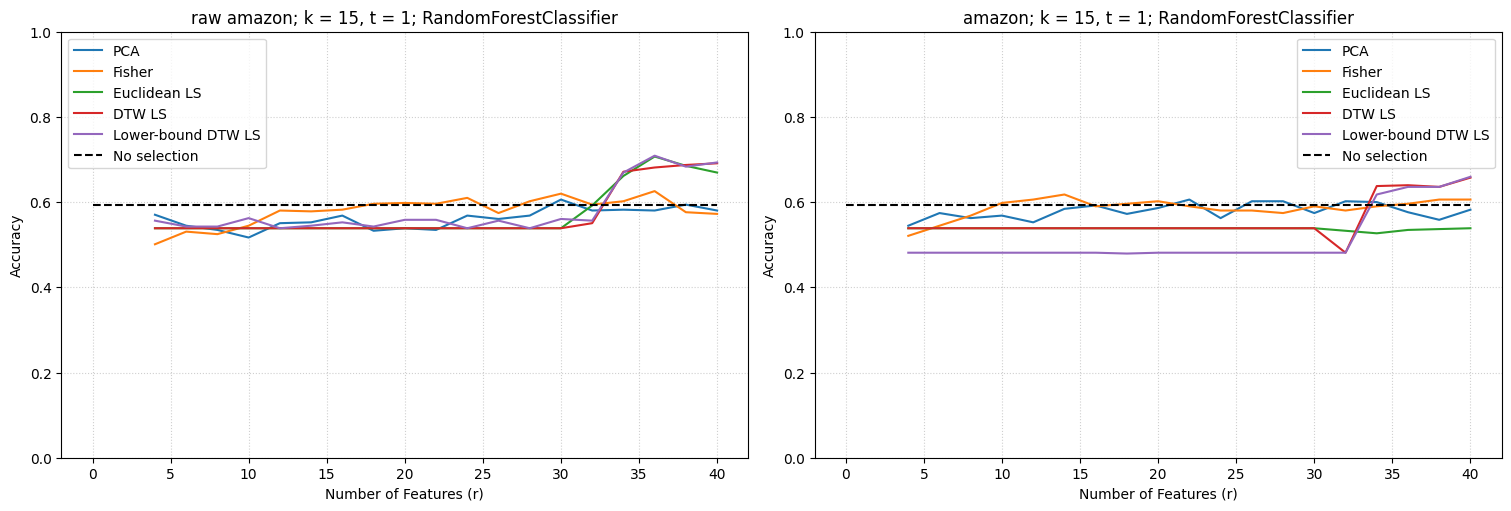

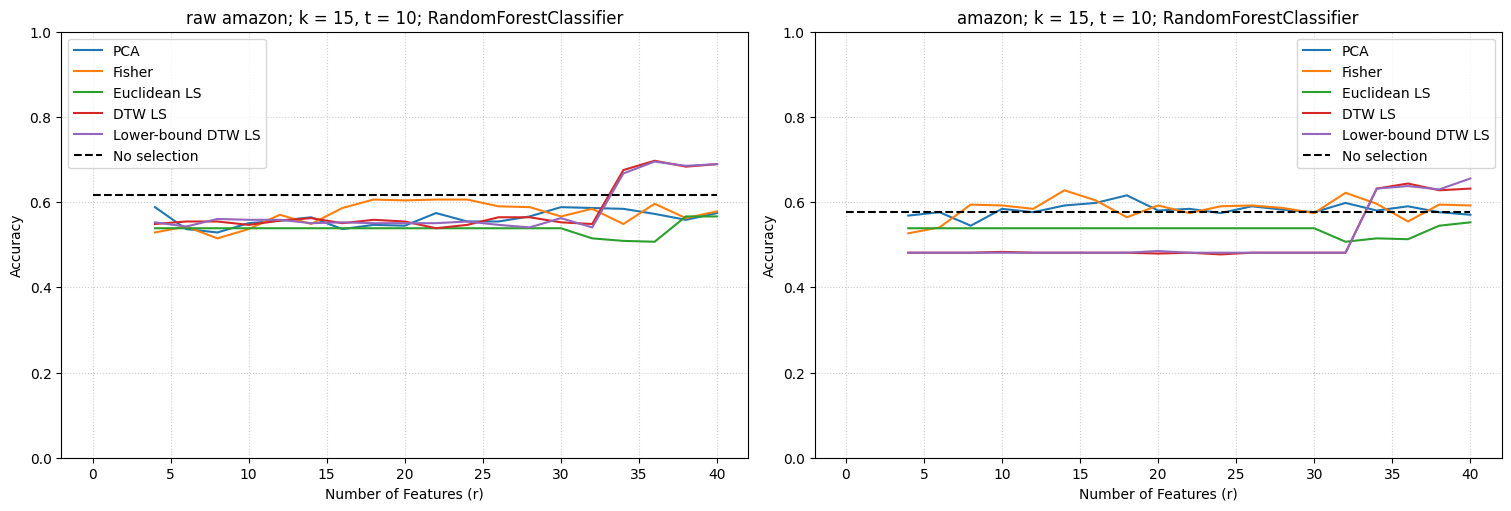

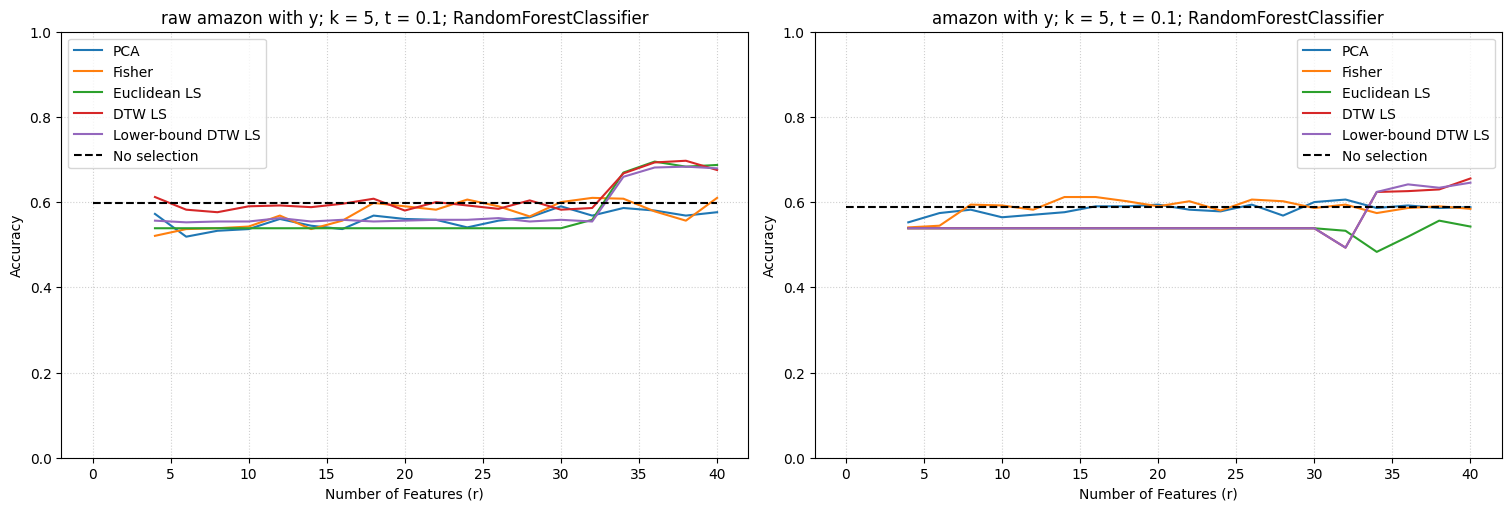

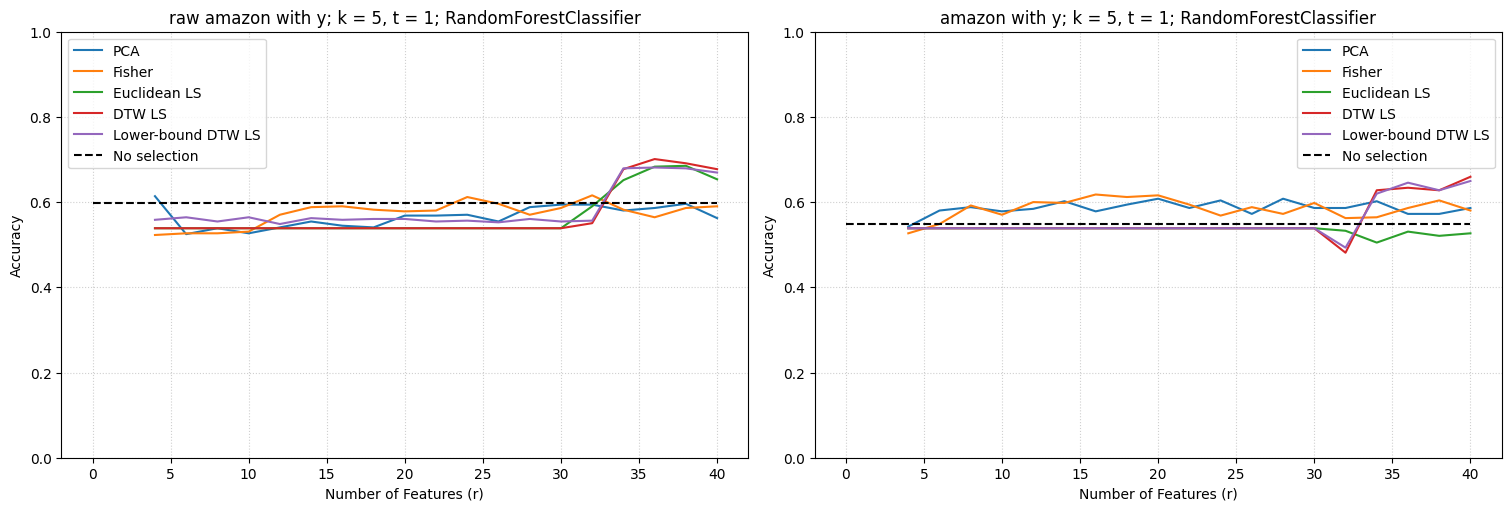

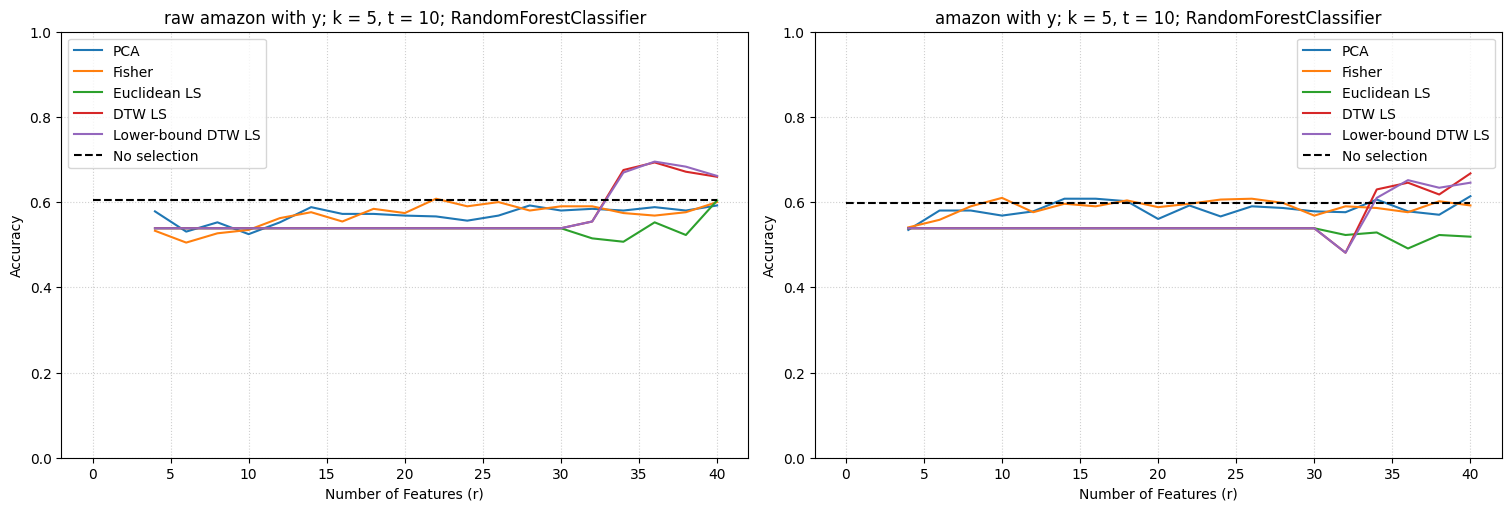

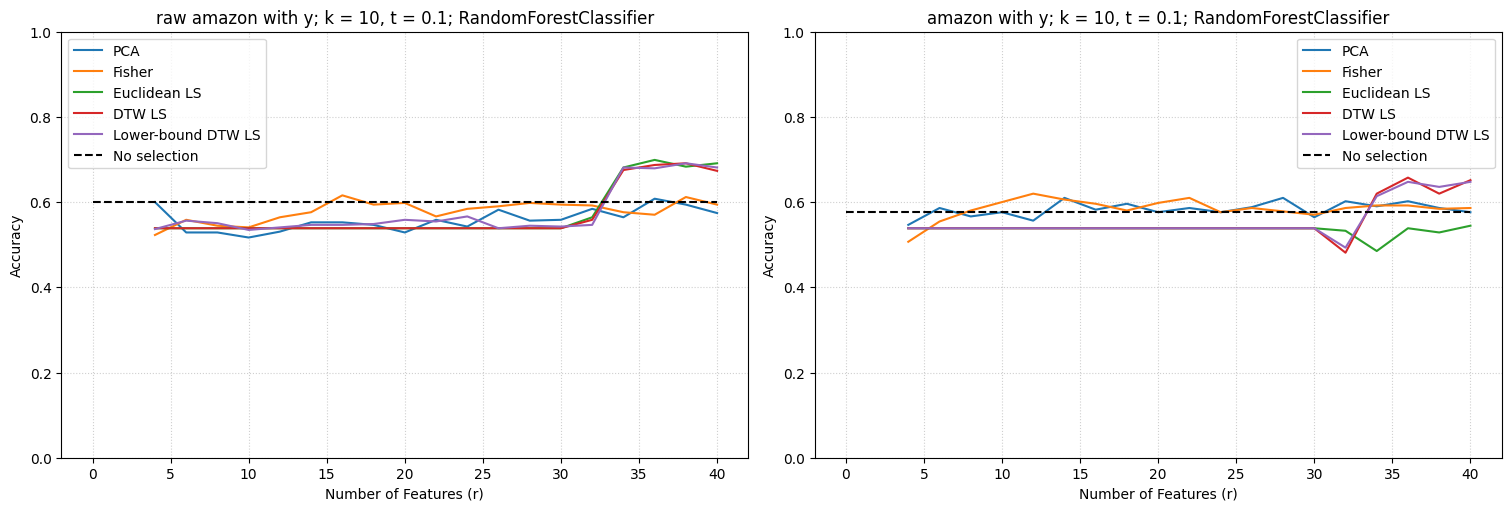

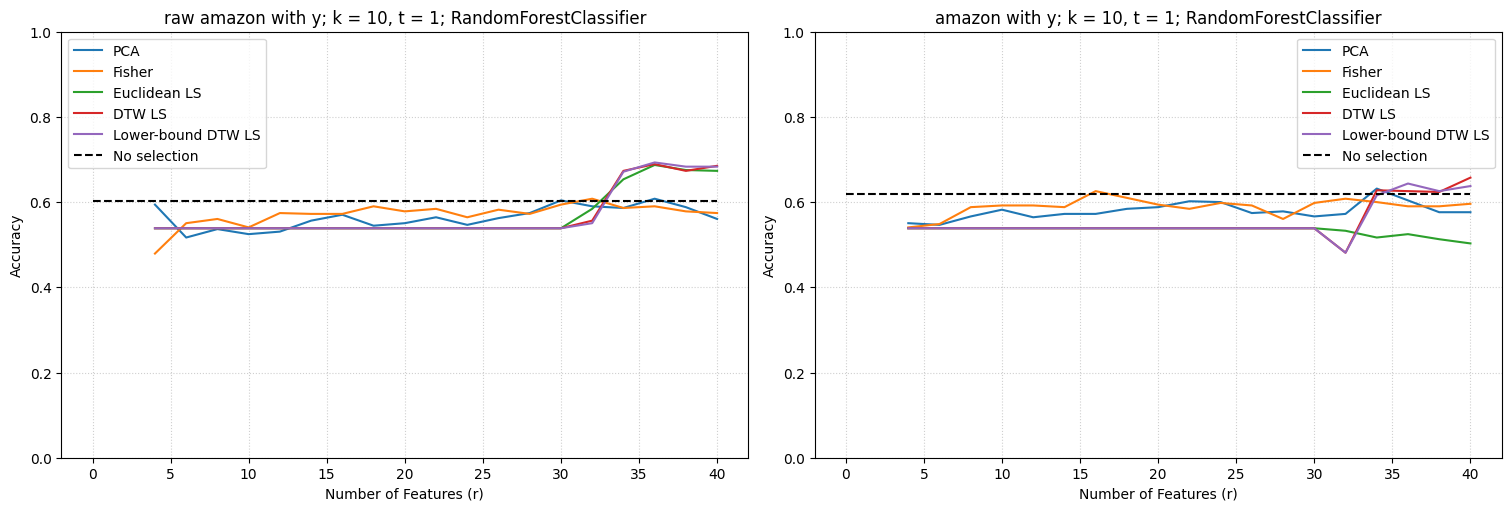

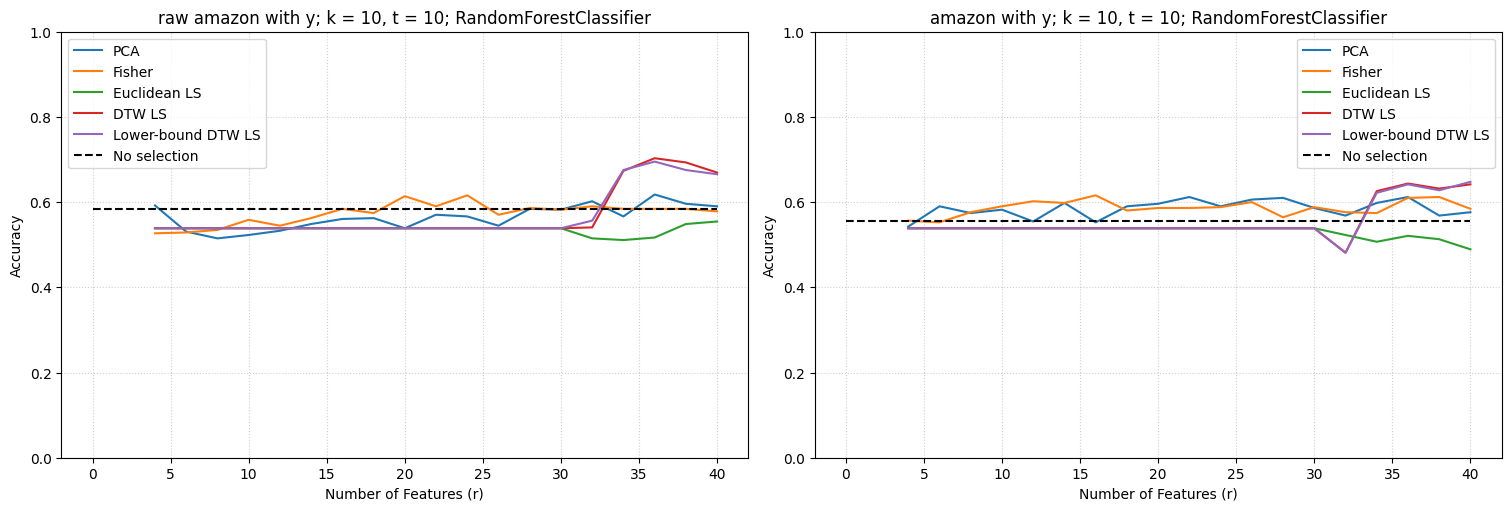

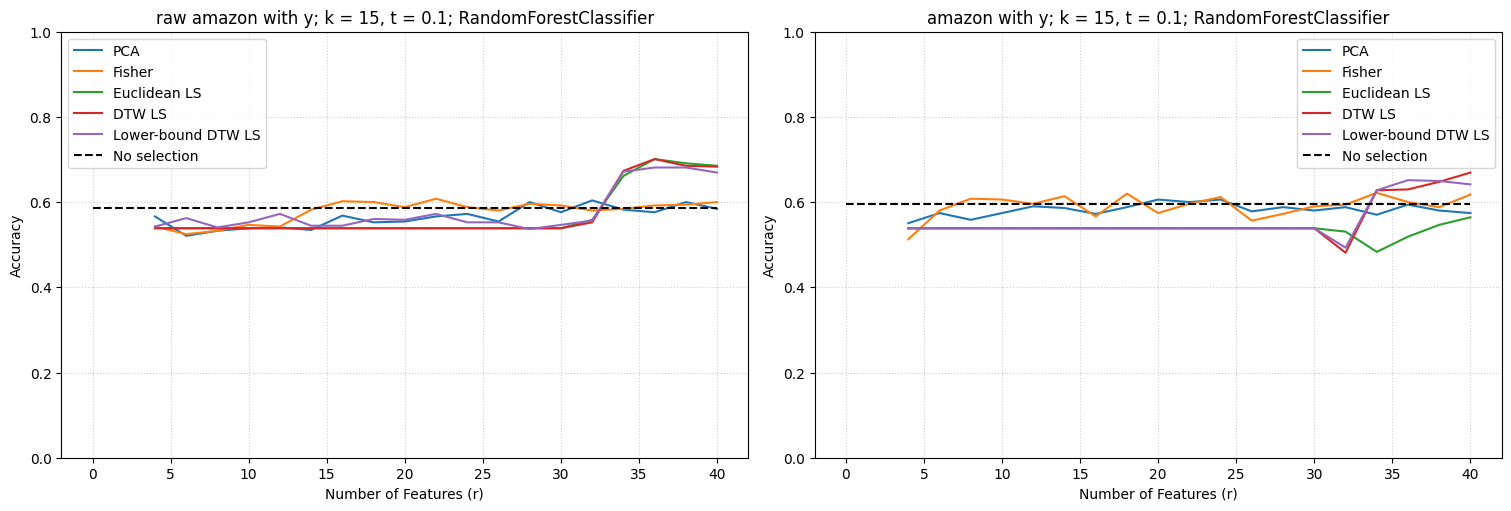

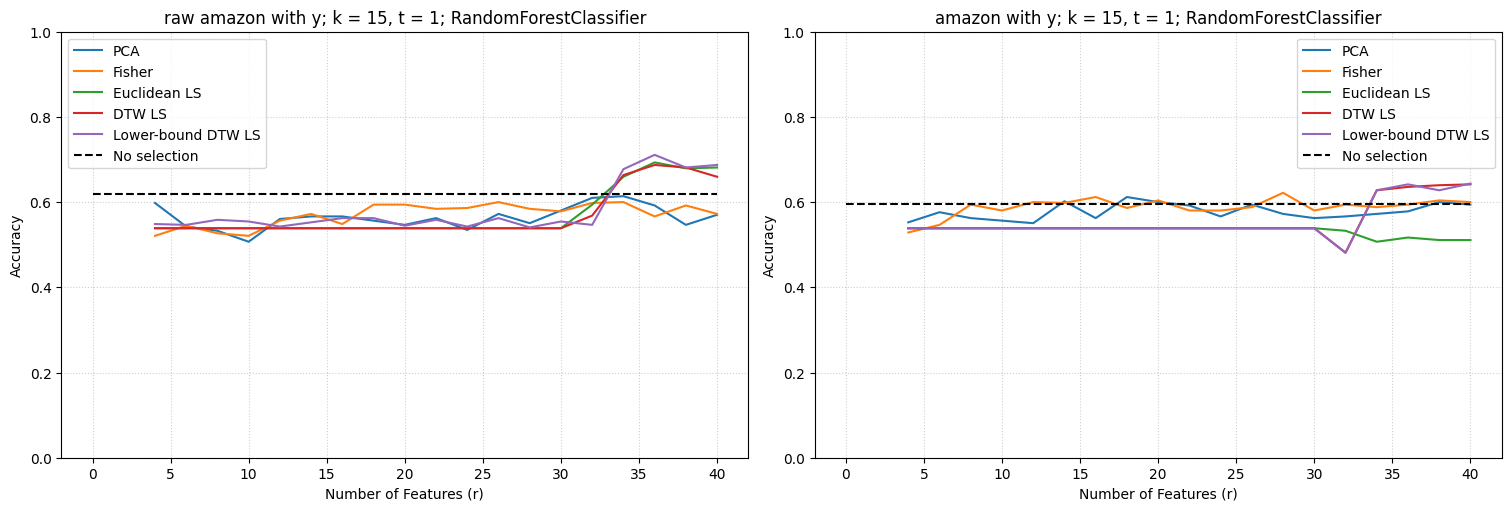

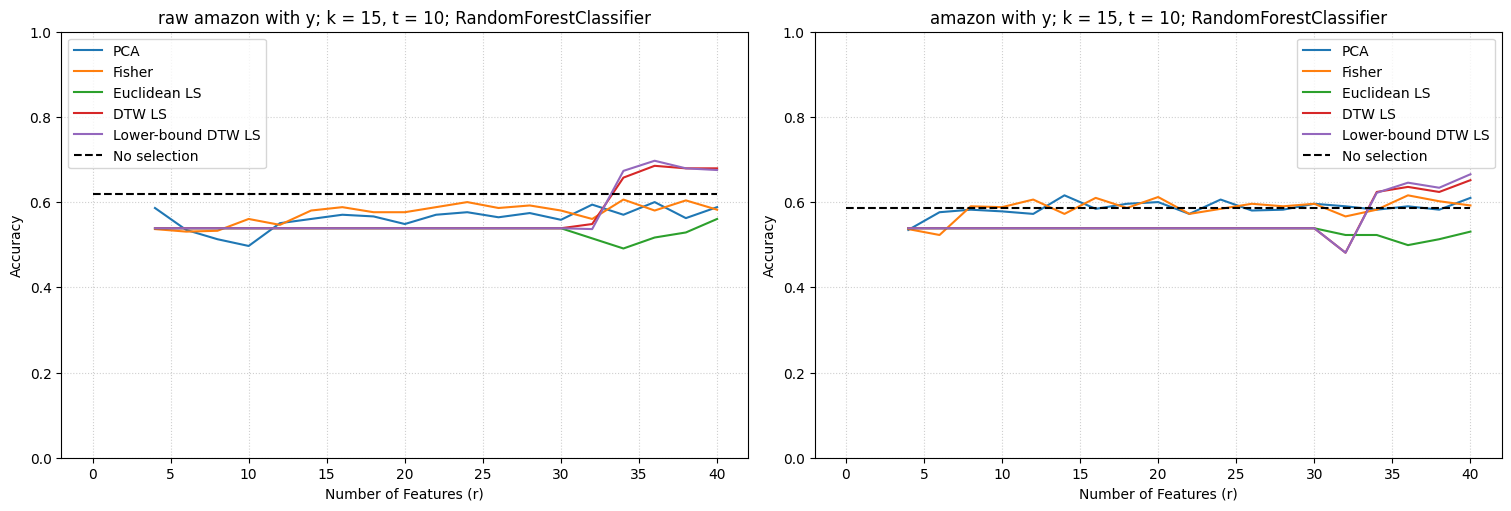

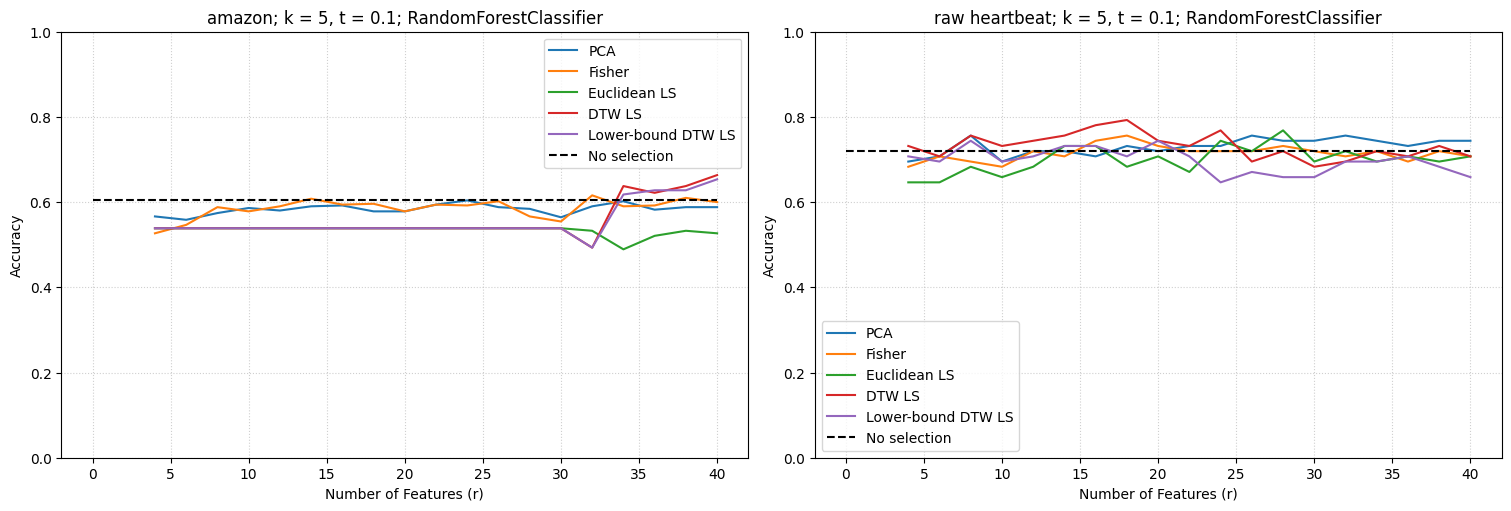

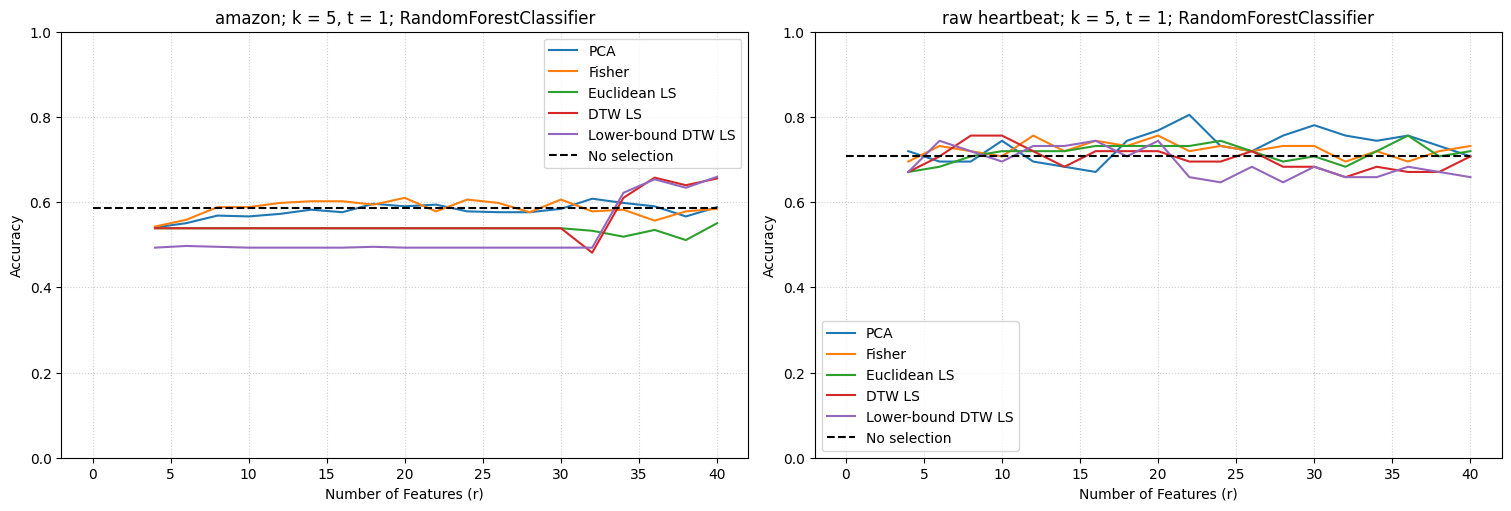

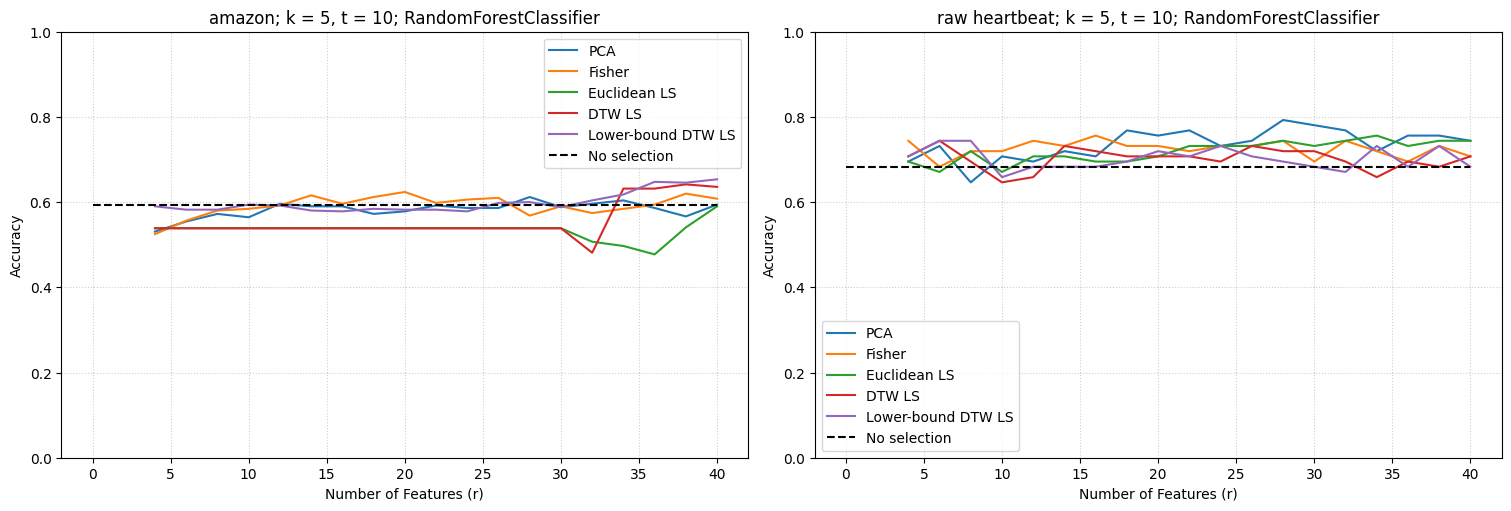

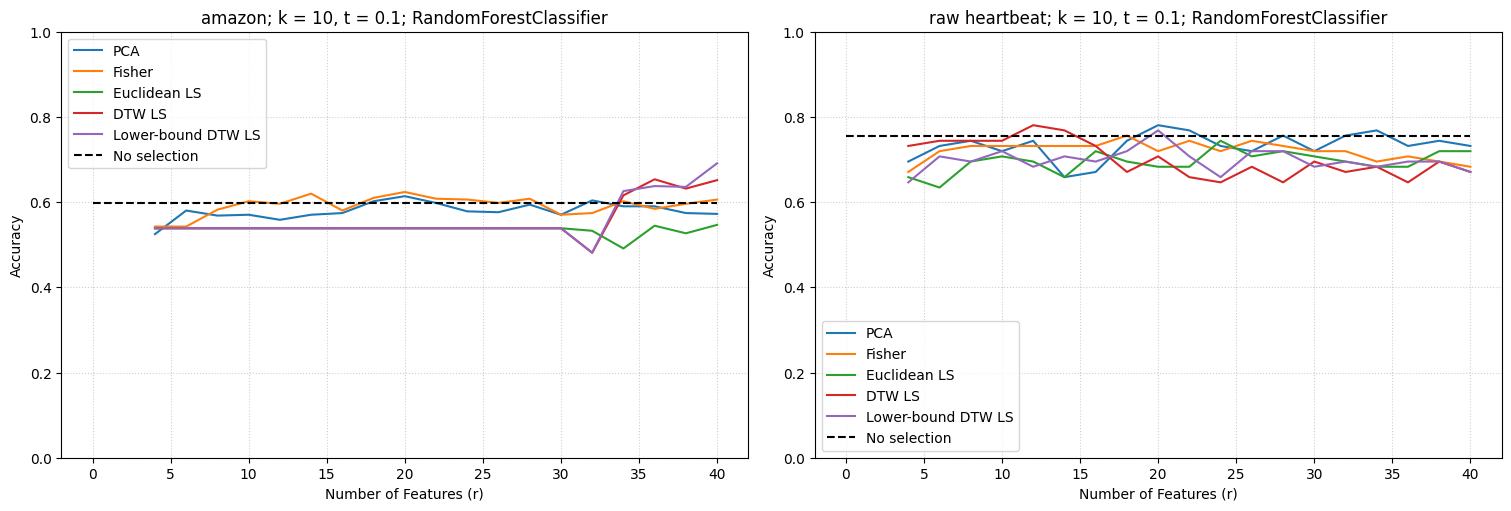

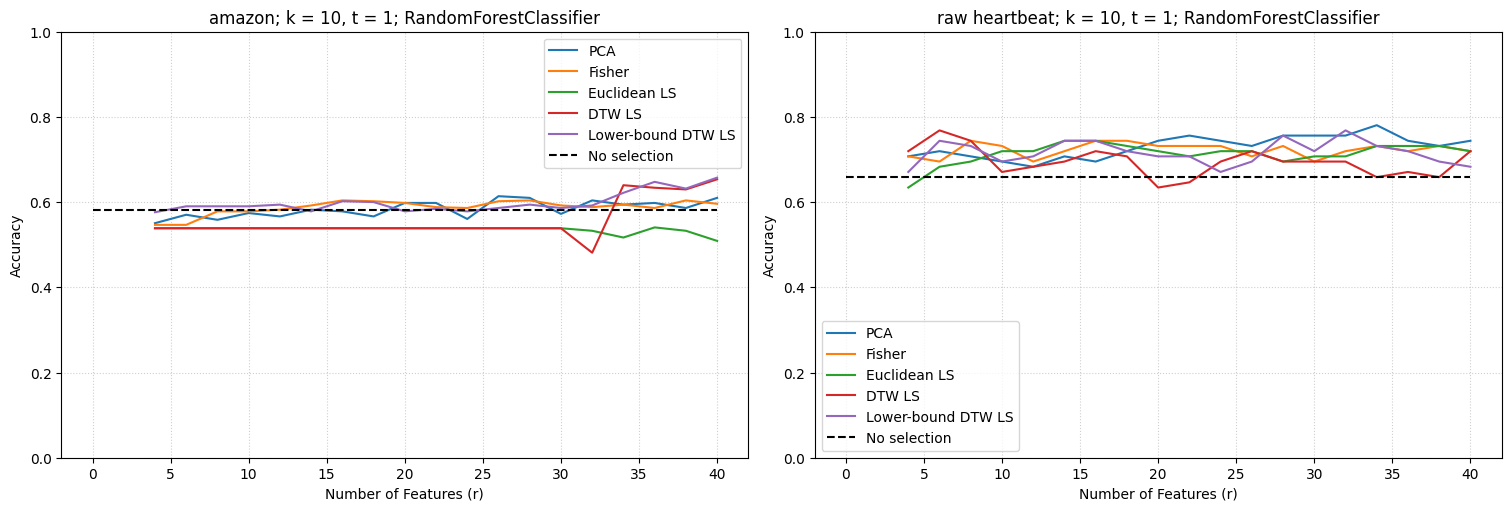

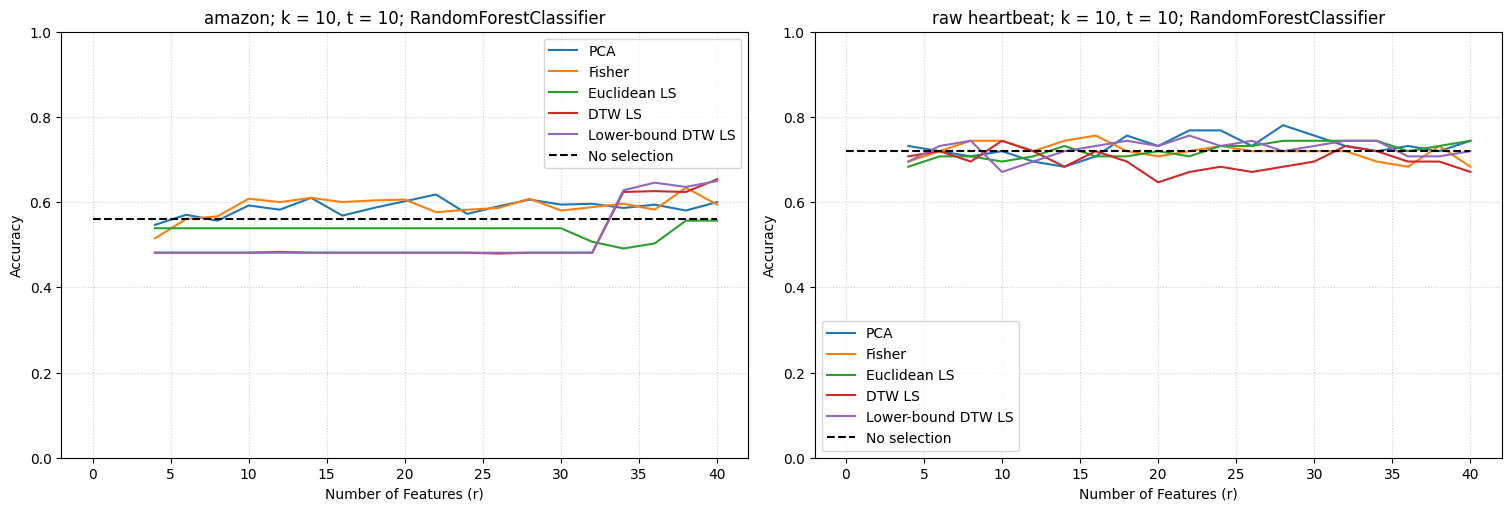

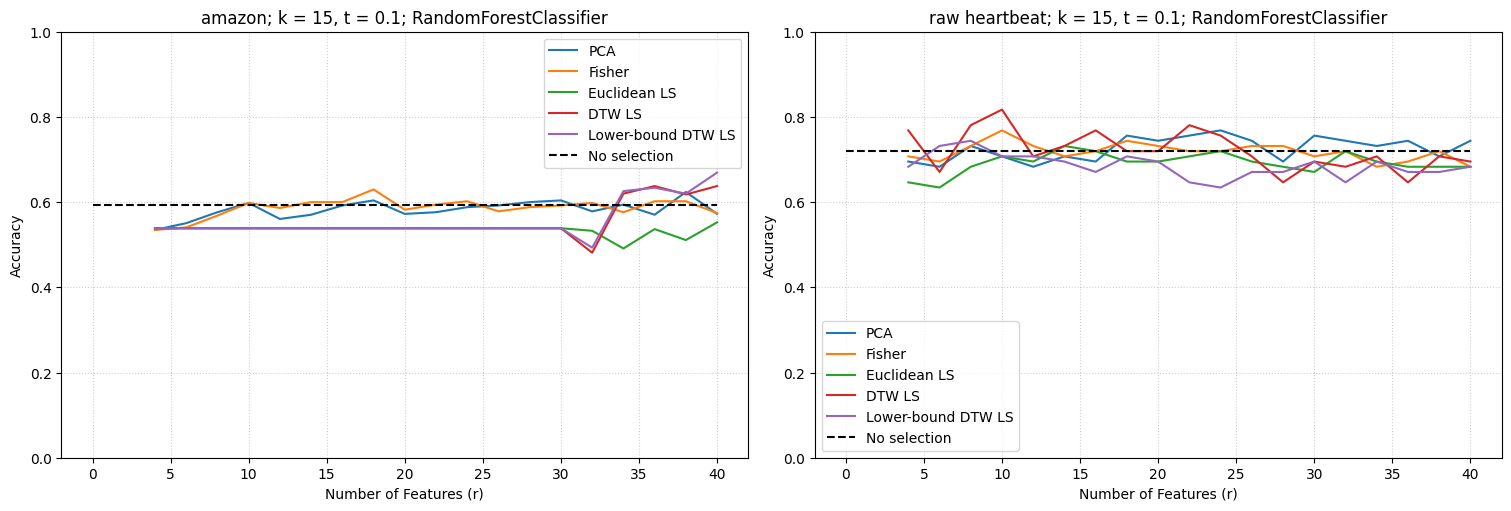

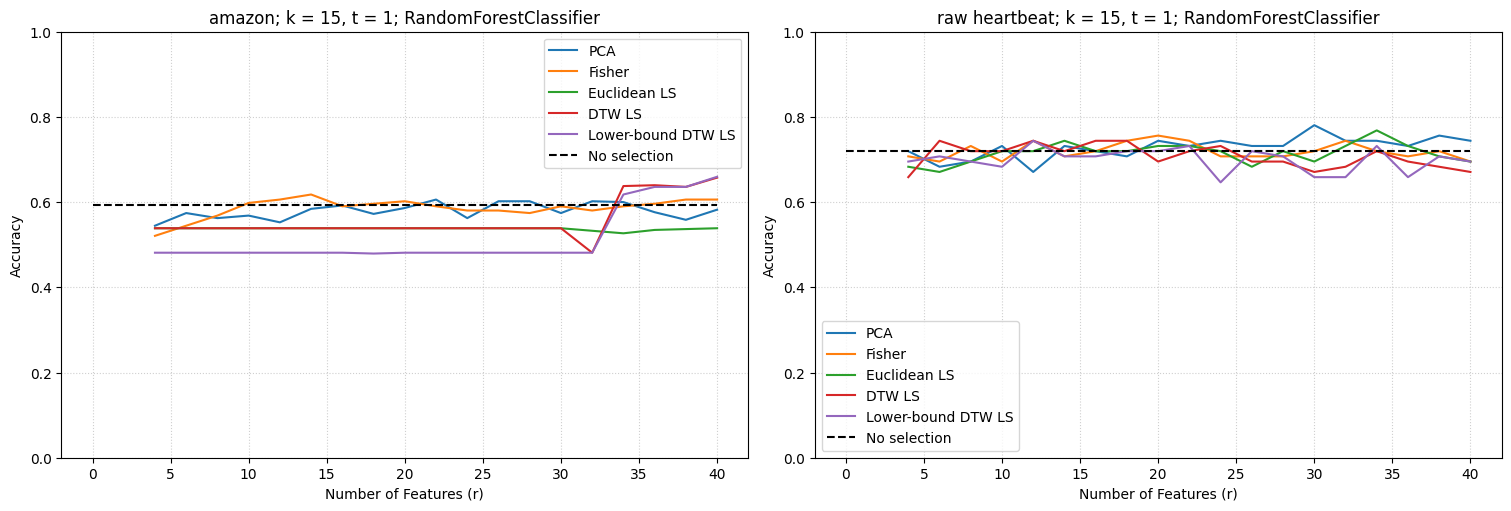

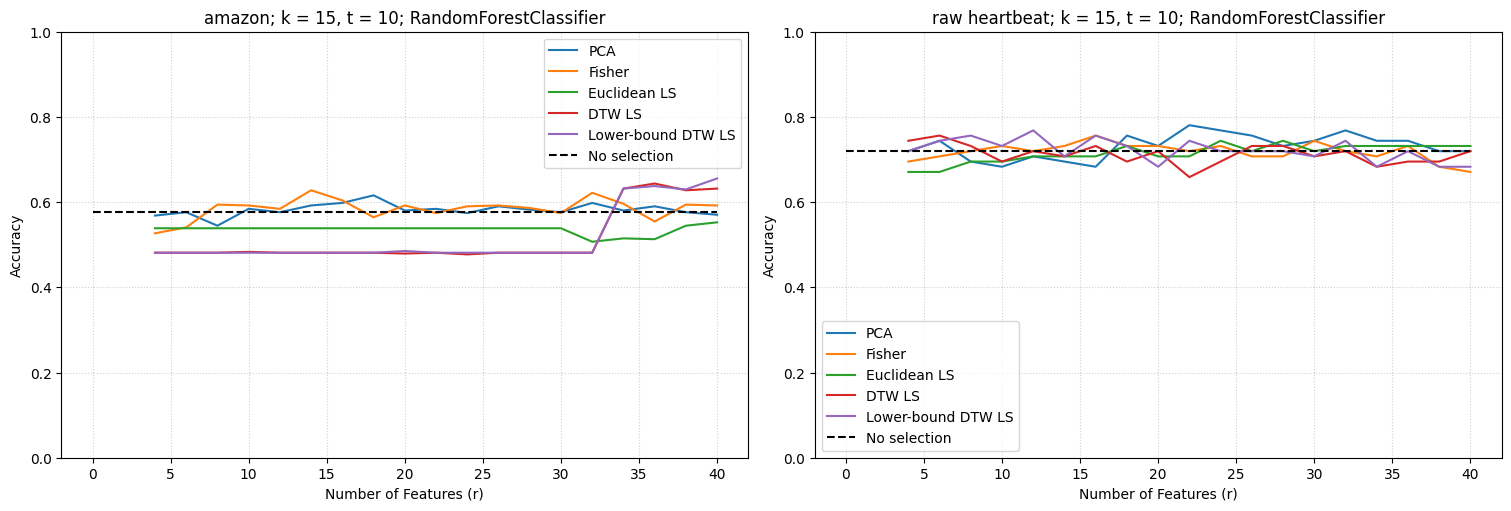

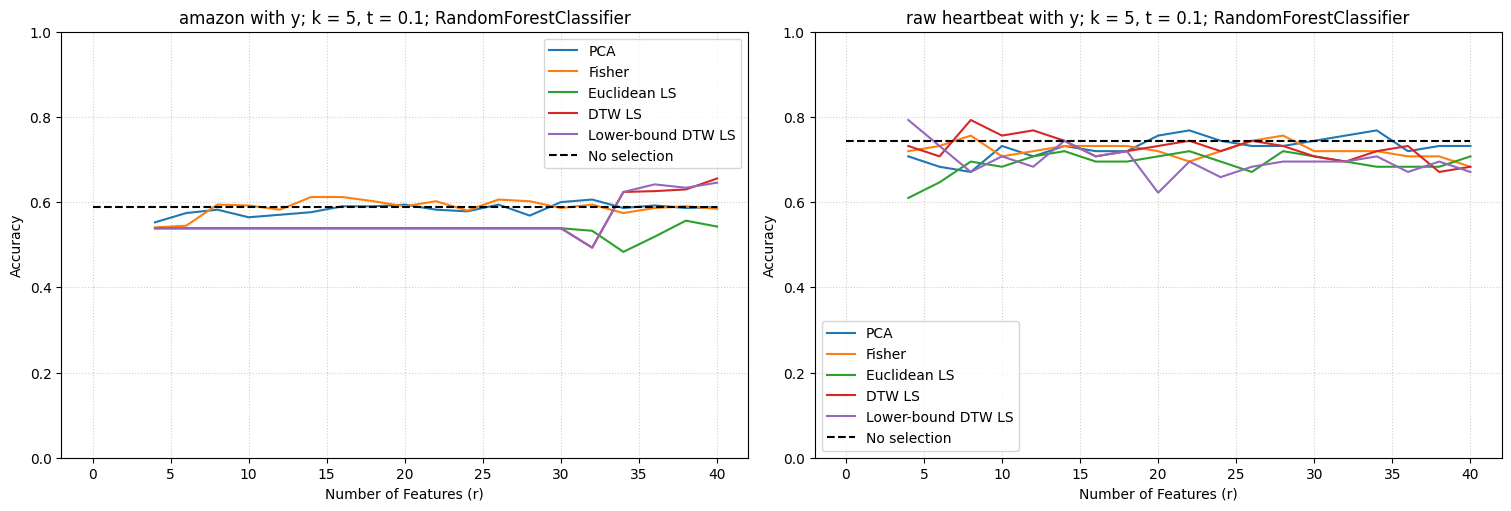

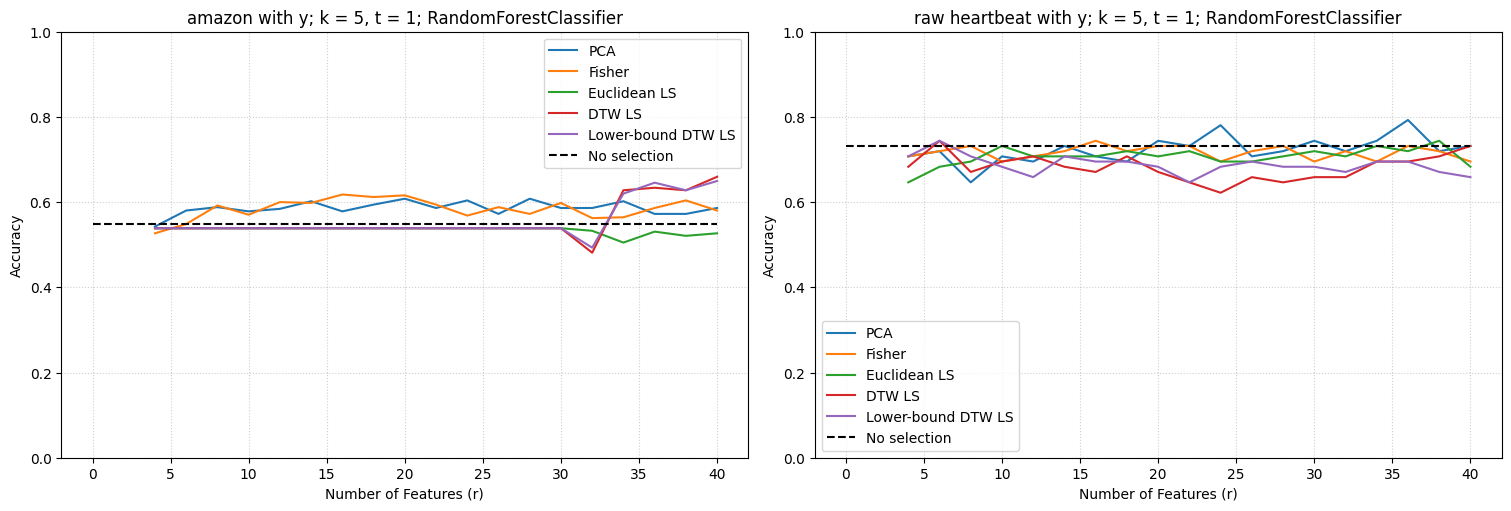

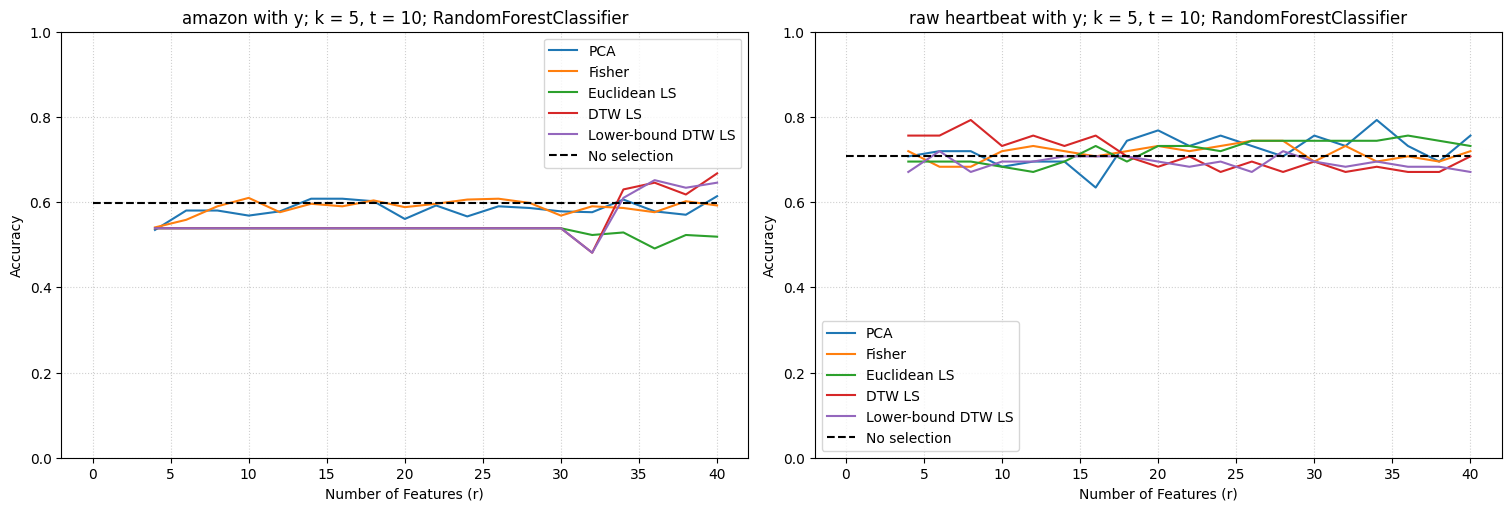

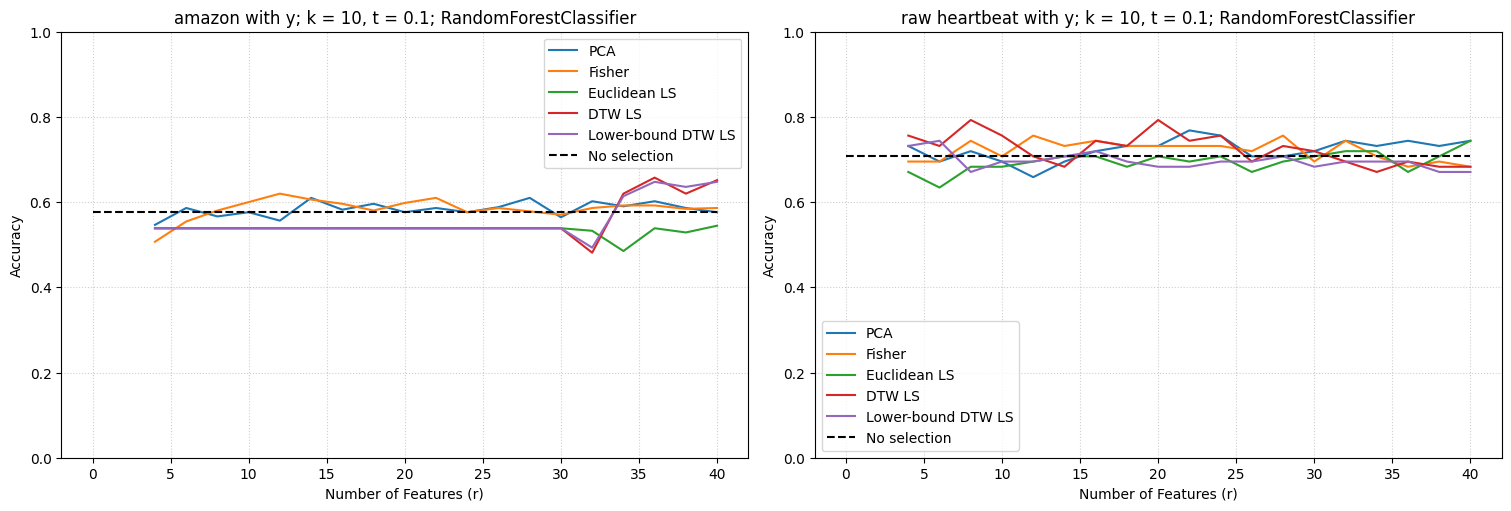

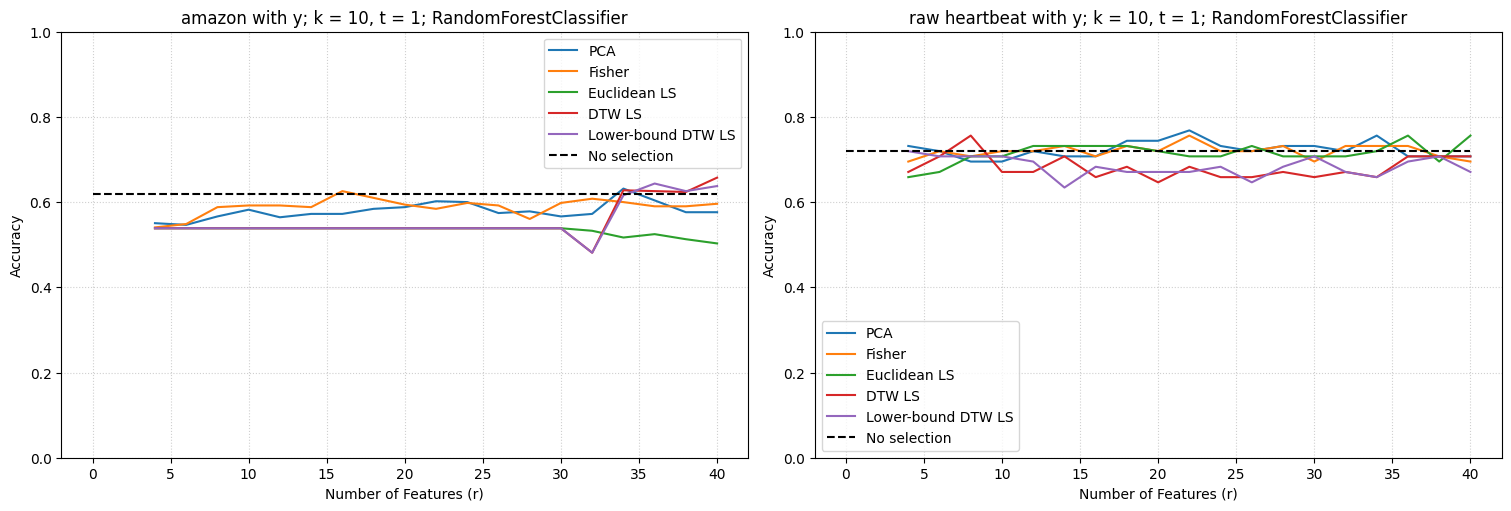

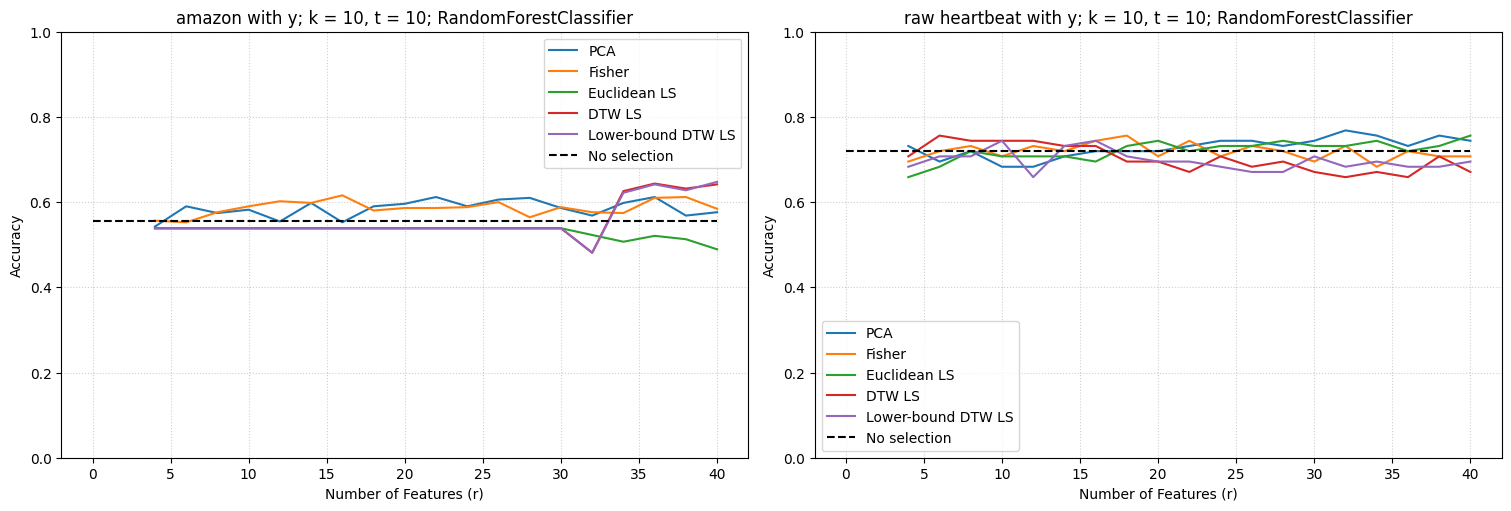

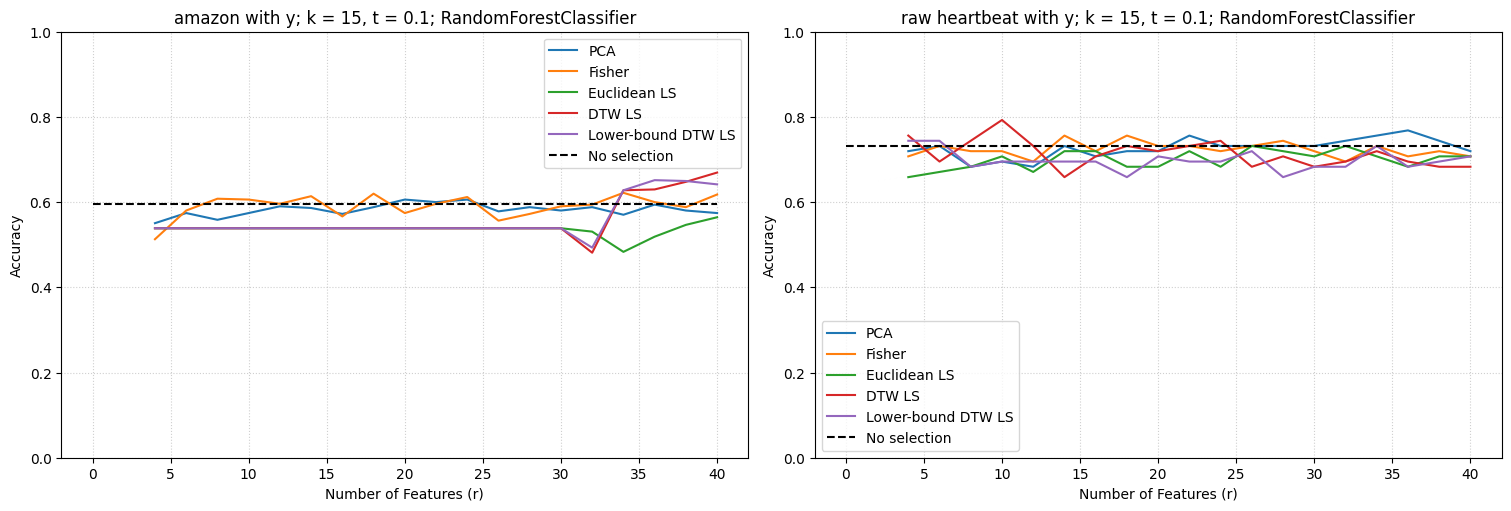

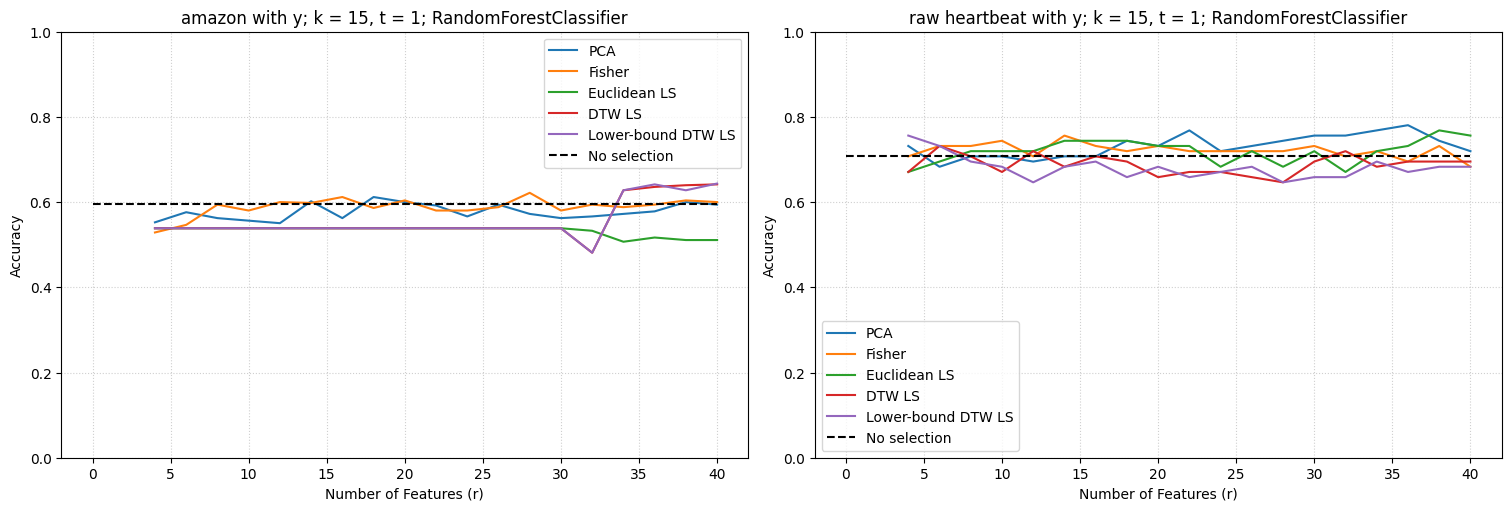

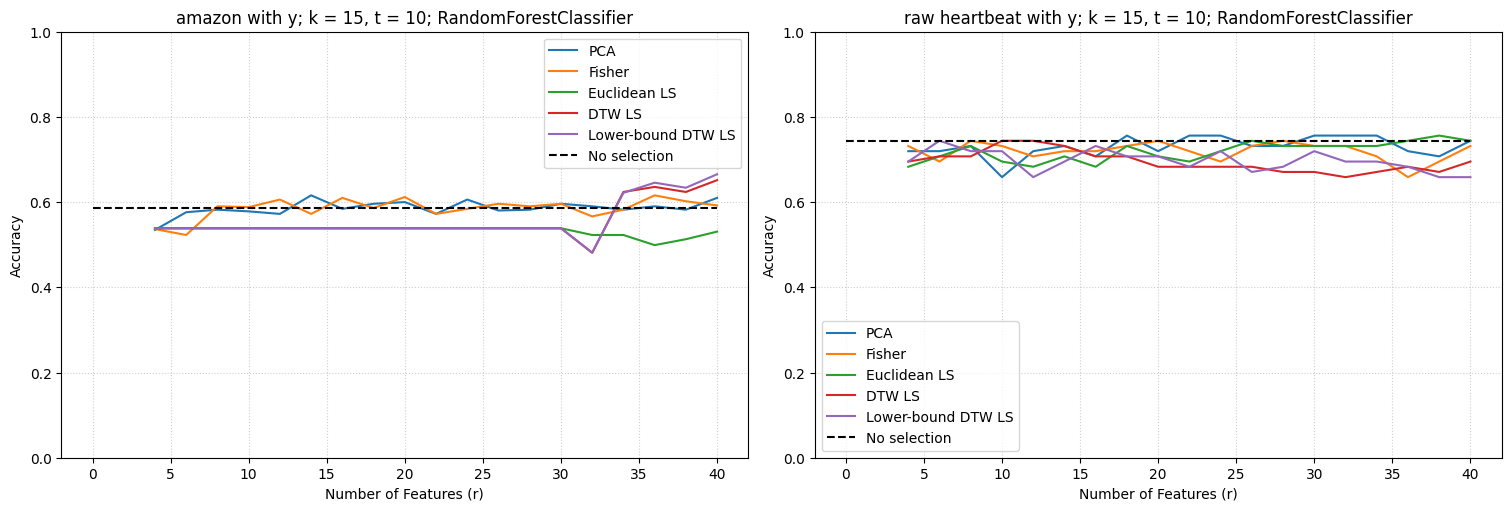

In [6]:
plot_experiments(results)

In [7]:
# save_data(results)